In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5109, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.isnull().any().any()

True

In [6]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [7]:
df.isnull().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039342
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
df.notnull().mean()

id                   1.000000
gender               1.000000
age                  1.000000
hypertension         1.000000
heart_disease        1.000000
ever_married         1.000000
work_type            1.000000
Residence_type       1.000000
avg_glucose_level    1.000000
bmi                  0.960658
smoking_status       1.000000
stroke               1.000000
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [13]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
#how many male and female do we have in our dataset
gender1 = df.groupby(['gender']).size()
pd.DataFrame(gender1)

,0
gender,
Female,2897
Male,2011


In [18]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of Male and Female in our Dataset')

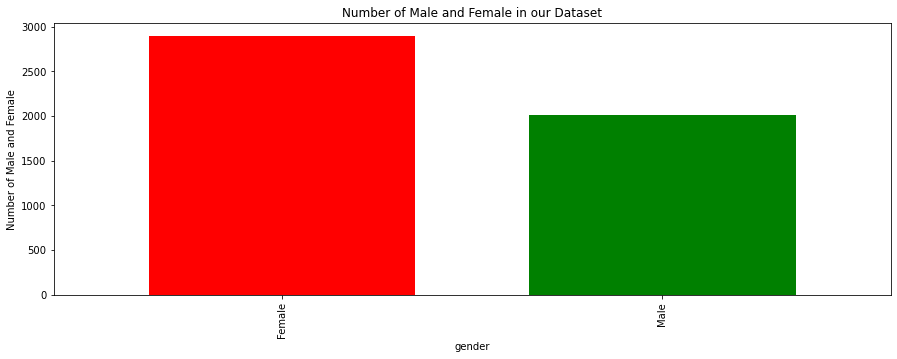

In [22]:
# How difference is the male and female
plt.figure(figsize=(15,5))
gender1.plot(
    kind = "bar",
    width = 0.7,
    color = ('red', 'green'))

plt.ylabel('Number of Male and Female')
plt.xlabel('gender')
plt.title('Number of Male and Female in our Dataset')

In [23]:
#how many male and femmale are married 
gender1 = df.groupby(['gender', 'ever_married']).size()
pd.DataFrame(gender1)

0
gender ever_married      
Female No             964
       Yes           1933
Male   No             740
       Yes           1271

Text(0.5, 0, 'gender')

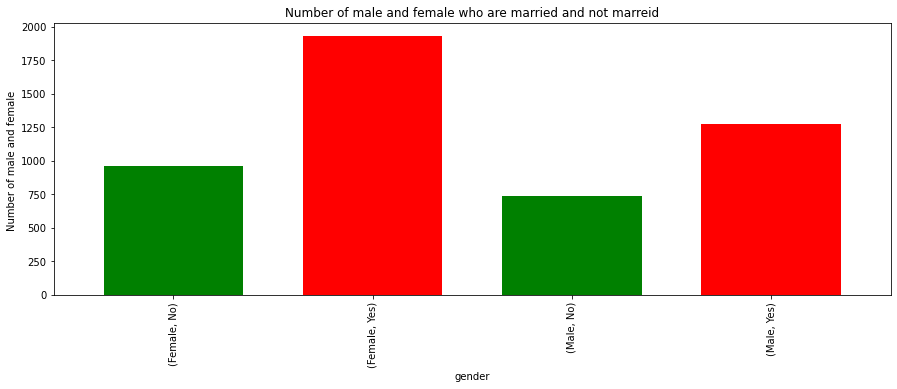

In [24]:
# How difference is the male and female stroke
plt.figure(figsize=(15,5))
gender1.plot(
    width = 0.7,
    kind = "bar",
    color = ('green', 'red'))

plt.title("Number of male and female who are married and not marreid")
plt.ylabel('Number of male and female ')
plt.xlabel('gender')



In [26]:
#how many male have hpertention, heart disease ans smokes and has stroke in different countryes
#df[(df['gender'] =='Female') |  (df['stroke'] == "0") | (df['hypertension'] == '0')]
#how many male and female are marred and has stroke
#df.groupby(['gender', 'ever_married', 'stroke'])[['stroke']].count()

In [27]:
#sort the dataset by gender and find how many people has stroke
# How difference is the male and female stroke
Q1 = df.groupby(['gender', 'stroke'])[['stroke']].count()
Q1


stroke
gender stroke        
Female 0         2777
       1          120
Male   0         1922
       1           89

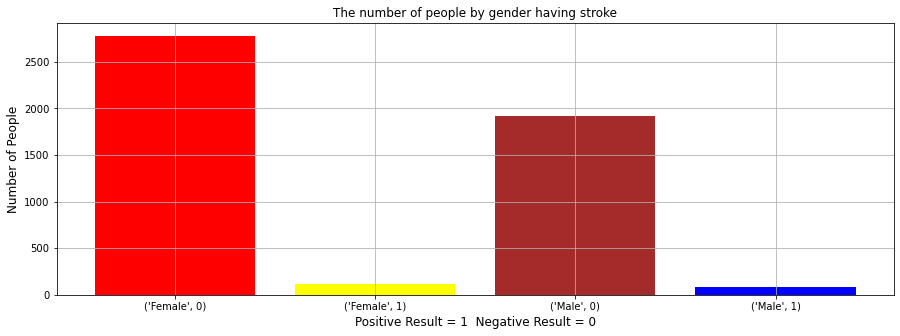

In [32]:

# How difference is the male and female who have stroke
x = range(len(Q1))

plt.figure(figsize=(15,5))
plt.title("The number of people by gender having stroke")
plt.bar(x, Q1.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q1.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12);


In [33]:
#how differece is the male having stroke
male = df[df["gender"] == 'Male']
male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5096,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5097,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [34]:
Q1 = male.groupby('stroke')[['stroke']].count()
Q1

,stroke
stroke,
0,1922
1,89


Text(0.5, 0, 'Positive Result = 1  Negative Result = 0')

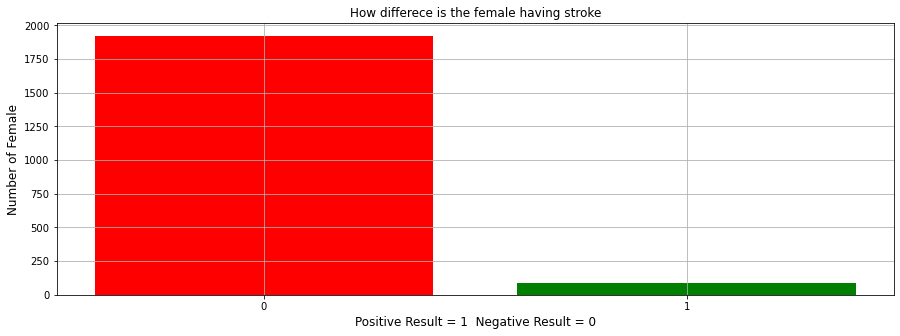

In [36]:
x = range(len(Q1))
plt.figure(figsize=(15,5))
plt.xticks(x, Q1.index, fontsize=10)
plt.title("How differece is the female having stroke")
plt.bar(x, Q1.stroke, color= ['red', 'green'])
plt.grid(True)
plt.ylabel("Number of Female", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12)

In [37]:
#how differece is the male having stroke
Female = df[df["gender"] == 'Female']
Female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [38]:
female = df[df["gender"] == 'Female']
female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [39]:
Q1 = female.groupby('stroke')[['stroke']].count()
Q1

,stroke
stroke,
0,2777
1,120


Text(0.5, 0, 'Positive Result = 1  Negative Result = 0')

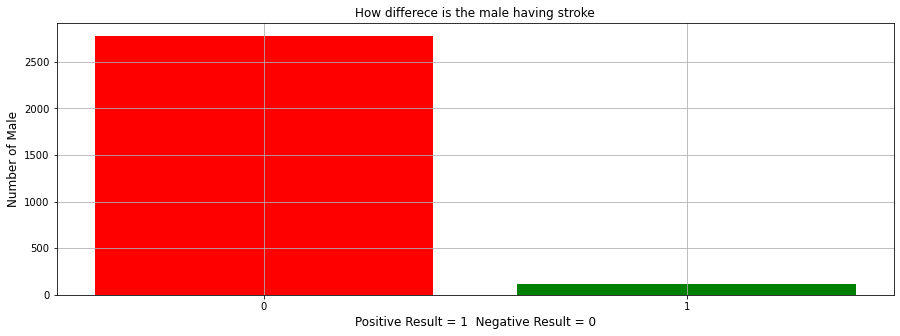

In [40]:
x = range(len(Q1))
plt.figure(figsize=(15,5))
plt.title("How differece is the male having stroke")
plt.bar(x, Q1.stroke, color= ['red', 'green'])
plt.grid(True)
plt.xticks(x, Q1.index, fontsize=10)
plt.ylabel("Number of Male", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12)

In [41]:
Q2 = female.groupby(['ever_married', 'stroke'])[['stroke']].count()
Q2.rename(columns = {'stroke': 'Number of People'})

Number of People
ever_married stroke                  
No           0                    948
             1                     16
Yes          0                   1829
             1                    104

Text(0.5, 0, 'Positive Result = 1  Negative Result = 0')

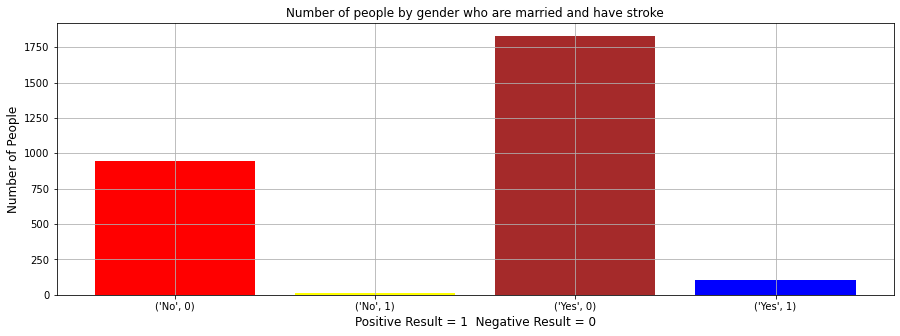

In [42]:
x = range(len(Q2))
plt.figure(figsize=(15,5))
plt.title("Number of people by gender who are married and have stroke")
plt.bar(x, Q2.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q2.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12)


In [43]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [45]:
#how differece is the male and female who are married and not marreid stroke according to their residence_type
Q3 = df.groupby(['gender', 'ever_married', 'Residence_type','stroke'])[['stroke']].count()
Q3

stroke
gender ever_married Residence_type stroke        
Female No           Rural          0          476
                                   1            3
                    Urban          0          472
                                   1           13
       Yes          Rural          0          889
                                   1           54
                    Urban          0          940
                                   1           50
Male   No           Rural          0          362
                                   1            4
                    Urban          0          371
                                   1            3
       Yes          Rural          0          591
                                   1           39
                    Urban          0          598
                                   1           43

Text(0.5, 0, 'Positive Result = 1  Negative Result = 0')

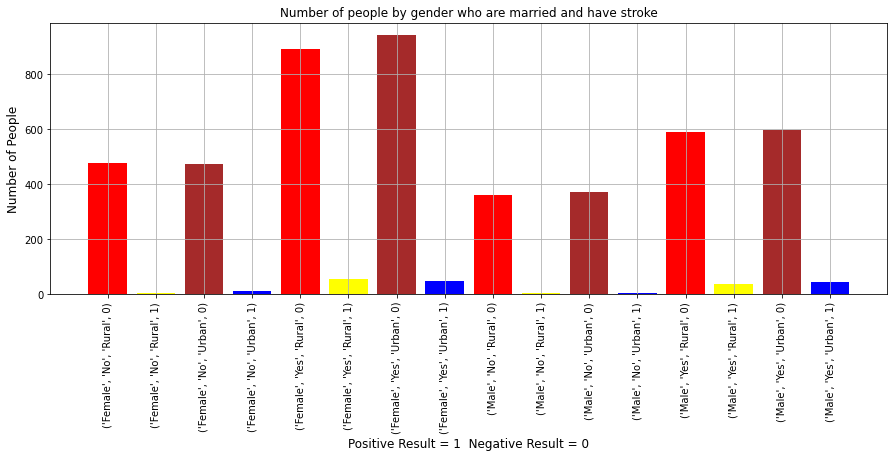

In [46]:
x = range(len(Q3))
plt.figure(figsize=(15,5))
plt.title("Number of people by gender who are married and have stroke")
plt.bar(x, Q3.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q3.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12)


In [47]:
#find the number of male who are married and they live in urban and has stroke
Q3 = df[df['Residence_type'] == 'Urban']
Q3
MaleDisc = Q3[Q3['gender'] == 'Male']
MaleDisc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
16,56112,Male,64.00,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,34120,Male,75.00,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
24,4219,Male,71.00,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5091,56799,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5093,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5096,64520,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0


In [48]:
UrbanMale = MaleDisc.groupby(['ever_married', 'stroke'])[['stroke']].count()
UrbanMale.rename(columns = {'stroke': 'Number of People'})

Number of People
ever_married stroke                  
No           0                    371
             1                      3
Yes          0                    598
             1                     43

Text(0.5, 1.0, 'Number of Male who got marrried, live in urban, and has stroke')

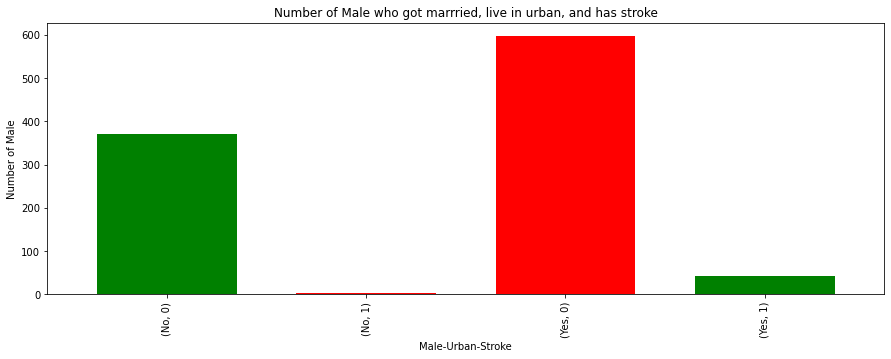

In [49]:
UrbanMale.plot(width = 0.7, kind = "bar", figsize = (15,5), color = ('green','red', 'red'), legend= False)
plt.ylabel('Number of Male')
plt.xlabel('Male-Urban-Stroke')
plt.title("Number of Male who got marrried, live in urban, and has stroke")

In [50]:
#find the number of male who are married and they live in urban and has stroke
Q3 = df[df['Residence_type'] == 'Rural']
Q3
MaleDisc1 = Q3[Q3['gender'] == 'Male']
MaleDisc1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
23,64778,Male,82.00,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
25,70822,Male,80.00,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
31,33879,Male,42.00,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5090,6369,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5094,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5095,41512,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5099,68398,Male,82.00,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [51]:
RuralMale = MaleDisc1.groupby(['ever_married','stroke'])[['stroke']].count()
RuralMale.rename(columns = {'stroke': 'Number of People'})

Number of People
ever_married stroke                  
No           0                    362
             1                      4
Yes          0                    591
             1                     39

Text(0.5, 1.0, 'Number of Male who got marrried or single, live in Rural, and has stroke')

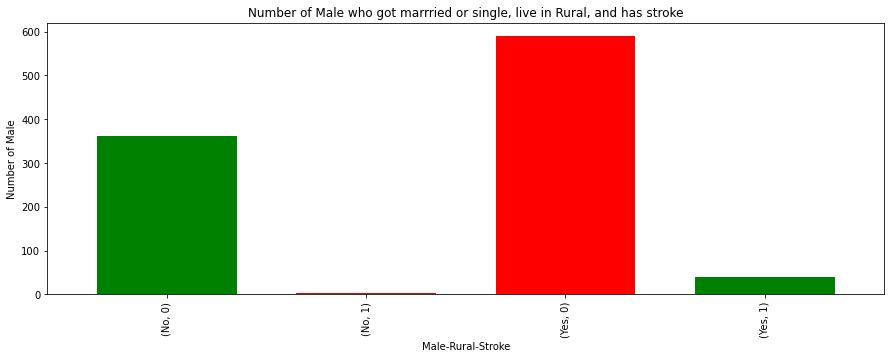

In [52]:
#find the number of male who are married or single and they live in Rural and has stroke
RuralMale.plot(width = 0.7, kind = "bar", figsize = (15,5), color = ('green','red', 'red'), legend= False)
plt.ylabel('Number of Male')
plt.xlabel('Male-Rural-Stroke')
plt.title("Number of Male who got marrried or single, live in Rural, and has stroke")


In [53]:
#find the number of female who are married or signle and they live in urban and has stroke
Q3 = df[df['Residence_type'] == 'Urban']
Q3
FemaleDisc = Q3[Q3['gender'] == 'Female']
FemaleDisc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5087,22190,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5100,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [54]:
UrbanFemale = FemaleDisc.groupby(['ever_married', 'stroke'])[['stroke']].count()
UrbanFemale

stroke
ever_married stroke        
No           0          472
             1           13
Yes          0          940
             1           50

Text(0.5, 1.0, 'Number of Female who got marrried or single, live in Urban, and has stroke')

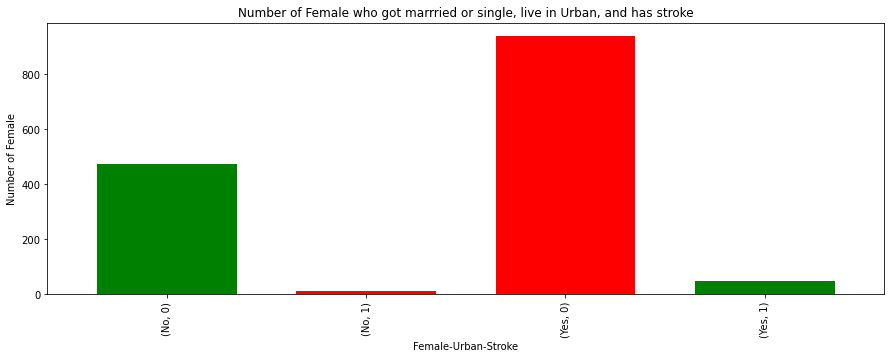

In [55]:
#find the number of female who are married or single and they live in Urban and has stroke
UrbanFemale.plot(width = 0.7, kind = "bar", figsize = (15,5), color = ('green','red', 'red'), legend= False)
plt.ylabel('Number of Female')
plt.xlabel('Female-Urban-Stroke')
plt.title("Number of Female who got marrried or single, live in Urban, and has stroke")

In [56]:
#find the number of female who are married or signle and they live in urban and has stroke
Q3 = df[df['Residence_type'] == 'Rural']
Q3
FemaleDisc = Q3[Q3['gender'] == 'Female']
FemaleDisc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
10,12109,Female,81.00,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
11,12095,Female,61.00,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
15,58202,Female,50.00,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
20,70630,Female,71.00,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5086,26214,Female,63.00,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0
5088,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5101,45010,Female,57.00,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,14180,Female,13.00,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [57]:
UrbanFemale = FemaleDisc.groupby(['ever_married', 'stroke'])[['stroke']].count()
UrbanFemale

stroke
ever_married stroke        
No           0          476
             1            3
Yes          0          889
             1           54

Text(0.5, 1.0, 'Number of Female who got marrried or single, live in Urban, and has stroke')

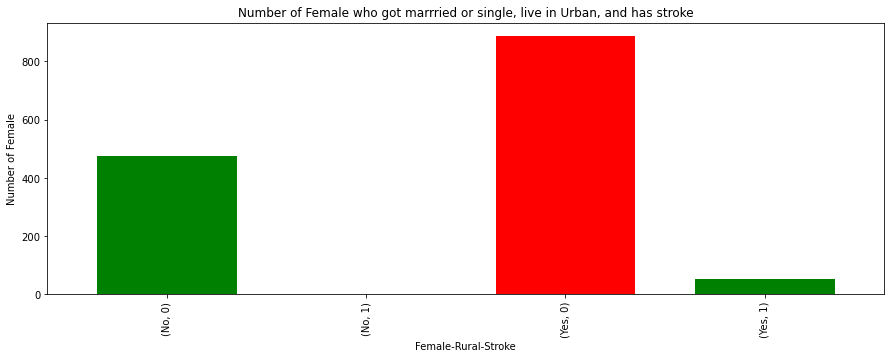

In [58]:
#find the number of female who are married or single and they live in Rural and has stroke
UrbanFemale.plot(width = 0.7, kind = "bar", figsize = (15,5), color = ('green','red', 'red'), legend= False)
plt.ylabel('Number of Female')
plt.xlabel('Female-Rural-Stroke')
plt.title("Number of Female who got marrried or single, live in Urban, and has stroke")

In [59]:
#Question_4: What is the number of male and female having hypertension?
Q4 = df.groupby(['gender', 'hypertension'])[['hypertension']].count()
Q4.rename(columns = {'hypertension': 'Number of People'})

Number of People
gender hypertension                  
Female 0                         2646
       1                          251
Male   0                         1811
       1                          200

Text(0.5, 0, 'Positive Result = 1  Negative Result = 0')

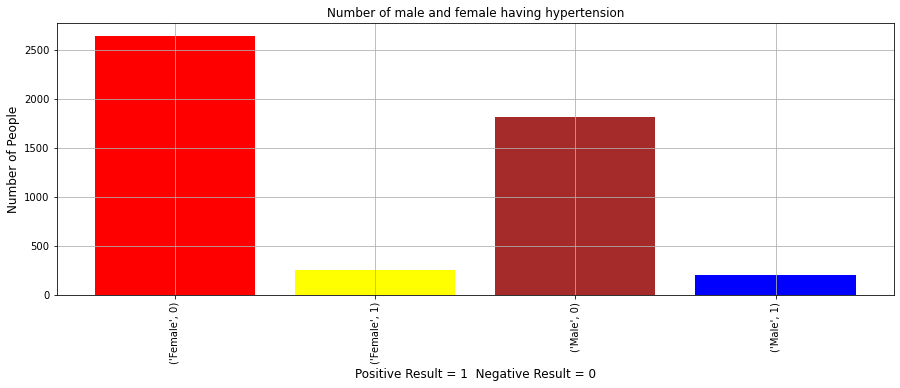

In [60]:
x = range(len(Q4))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number of male and female having hypertension")
plt.bar(x, Q4.hypertension, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q4.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Positive Result = 1  Negative Result = 0", fontsize= 12)

In [65]:
totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,
str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')

In [66]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [67]:
#What is the number of male and female smoking?
Q5 = df.groupby(['gender','smoking_status'])[['stroke']].count()
Q5

stroke
gender smoking_status         
Female Unknown             811
       formerly smoked     458
       never smoked       1203
       smokes              425
Male   Unknown             672
       formerly smoked     378
       never smoked        649
       smokes              312

Text(0.5, 0, 'Based on Smoking_Status')

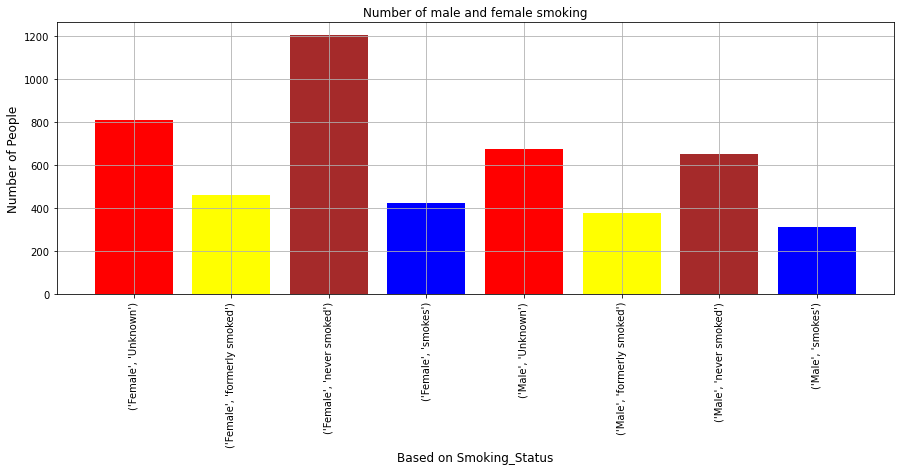

In [68]:
x = range(len(Q5))
plt.figure(figsize=(15,5))
plt.title("Number of male and female smoking")
plt.bar(x, Q5.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q5.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Smoking_Status", fontsize= 12)

In [69]:
smoke = df[df['smoking_status'] == 'smokes']
smoke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5071,71957,Female,35.0,0,0,Yes,Private,Rural,58.72,40.0,smokes,0
5073,30379,Female,52.0,0,0,Yes,Govt_job,Urban,104.00,25.6,smokes,0
5081,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
5083,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0


In [70]:
Q5 = smoke.groupby(['gender'])[['stroke']].count()
Q5

,stroke
gender,
Female,425
Male,312


Text(0.5, 0, 'Based on Smoking_Status')

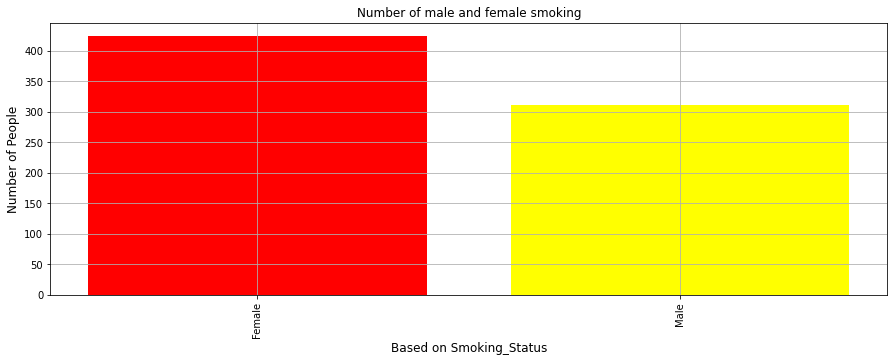

In [71]:
x = range(len(Q5))
plt.figure(figsize=(15,5))
plt.title("Number of male and female smoking")
plt.bar(x, Q5.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q5.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Smoking_Status", fontsize= 12)

In [72]:
smoke = df[df['smoking_status'] == 'formerly smoked']
smoke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
26,38047,Female,65.0,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
33,54401,Male,80.0,0,1,Yes,Self-employed,Urban,252.72,30.5,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5067,49598,Male,80.0,0,0,Yes,Self-employed,Urban,120.03,24.3,formerly smoked,0
5080,37680,Male,55.0,0,0,Yes,Govt_job,Rural,108.35,40.8,formerly smoked,0
5084,53525,Female,72.0,0,0,Yes,Private,Urban,83.89,33.1,formerly smoked,0
5086,26214,Female,63.0,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,0


In [73]:
#Does smoking has effect on stroke or not?
# for answering this one I have to find the number of people who are smoking. 
#The number of people who are formerly smoking, and the number of people who are not smoking.
Q6 = smoke.groupby(['stroke'])[['stroke']].count()
Q6.rename(columns = {'stroke': 'number of people'})

,number of people
stroke,
0,779
1,57


Text(0.5, 0, 'Based on Smoking_Status')

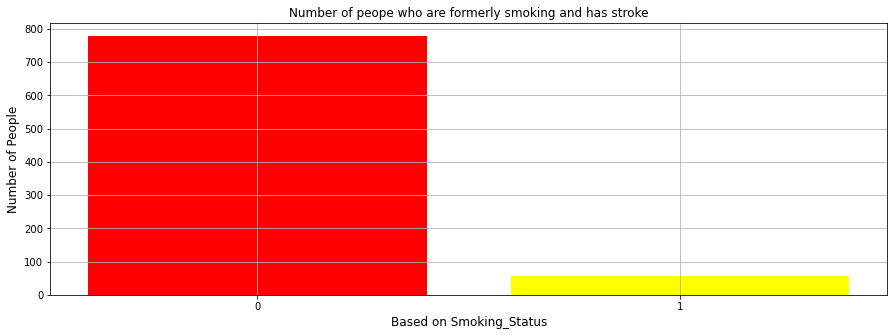

In [74]:
x = range(len(Q6))
plt.figure(figsize=(15,5))
plt.title("Number of peope who are formerly smoking and has stroke")
plt.bar(x, Q6.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q6.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Smoking_Status", fontsize= 12)

In [75]:
smoke1 = df[df['smoking_status'] == 'smokes']
smoke1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5071,71957,Female,35.0,0,0,Yes,Private,Rural,58.72,40.0,smokes,0
5073,30379,Female,52.0,0,0,Yes,Govt_job,Urban,104.00,25.6,smokes,0
5081,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
5083,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0


In [76]:
Q6 = smoke1.groupby(['stroke'])[['stroke']].count()
Q6.rename(columns = {'stroke': 'number of people'})

,number of people
stroke,
0,698
1,39


Text(0.5, 0, 'Based on Smoking_Status')

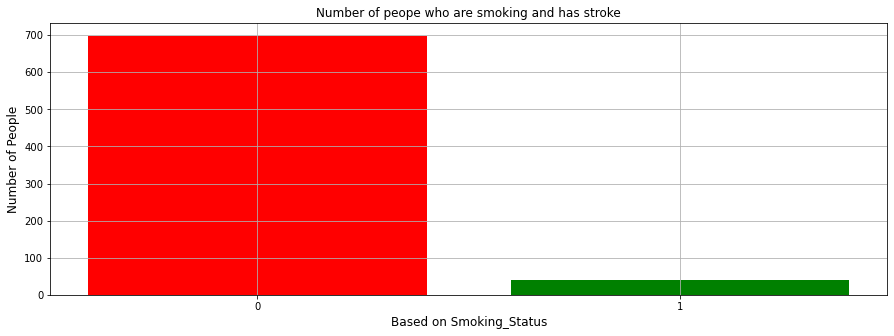

In [77]:
x = range(len(Q6))
plt.figure(figsize=(15,5))
plt.title("Number of peope who are smoking and has stroke")
plt.bar(x, Q6.stroke, color= ['red','green'])
plt.grid(True)
plt.xticks(x, Q6.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Smoking_Status", fontsize= 12)


In [78]:
smoke3 = df[df['smoking_status'] == 'never smoked']
smoke3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
5099,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [79]:
Q6 = smoke3.groupby(['stroke'])[['stroke']].count()
Q6.rename(columns = {'stroke': 'number of people'})

,number of people
stroke,
0,1768
1,84


Text(0.5, 0, 'Based on Smoking_Status')

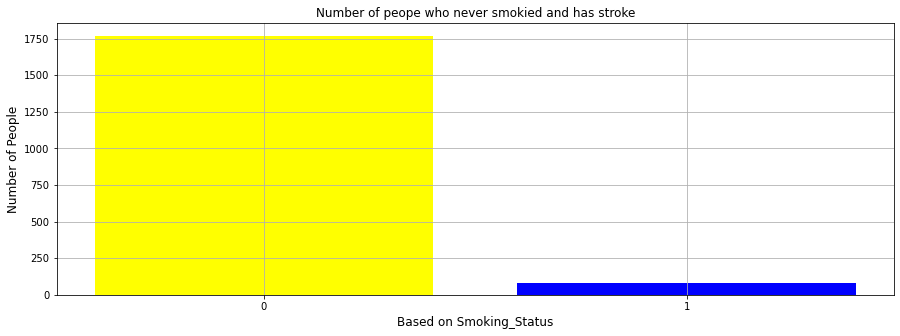

In [80]:
x = range(len(Q6))
plt.figure(figsize=(15,5))
plt.title("Number of peope who never smokied and has stroke")
plt.bar(x, Q6.stroke, color= ['yellow', 'blue'])
plt.grid(True)
plt.xticks(x, Q6.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Smoking_Status", fontsize= 12)

In [81]:
#What is the number of people having bmi higher than 30?
bmi = df[df['bmi'] > 30]
bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5091,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5096,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [82]:
Q6 = bmi.groupby('gender')[['bmi']].count()
Q6

,bmi
gender,
Female,1101
Male,792


Text(0.5, 0, 'Based on BMI')

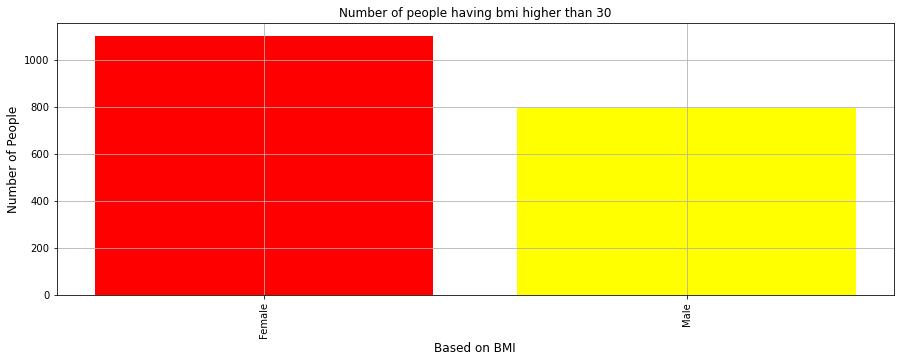

In [83]:
x = range(len(Q6))
plt.figure(figsize=(15,5))
plt.title("Number of people having bmi higher than 30")
plt.bar(x, Q6.bmi, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q6.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on BMI", fontsize= 12)

In [84]:
#What is the number of people having bmi h thaless 30?
bmi = df[df['bmi'] < 30]
bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [85]:
Q7 = bmi.groupby('gender')[['bmi']].count()
Q7

,bmi
gender,
Female,1782
Male,1206


Text(0.5, 0, 'Based on BMI')

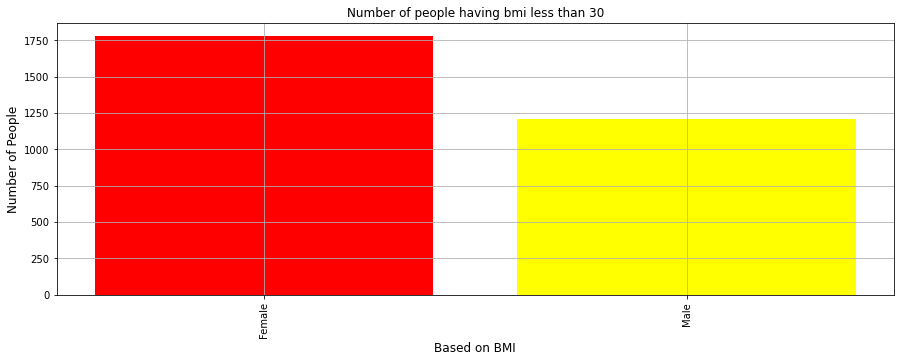

In [86]:
x = range(len(Q7))
plt.figure(figsize=(15,5))
plt.title("Number of people having bmi less than 30")
plt.bar(x, Q7.bmi, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q7.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on BMI", fontsize= 12)

In [87]:
#What is the status of stroke on people having bmi higher than 30?
bmi1 = df[df['bmi'] < 30]
bmi1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [88]:
Q8 = bmi1.groupby(['gender','stroke'])[['bmi']].count()
Q8

bmi
gender stroke      
Female 0       1715
       1         67
Male   0       1162
       1         44

Text(0.5, 0, 'Based on BMI')

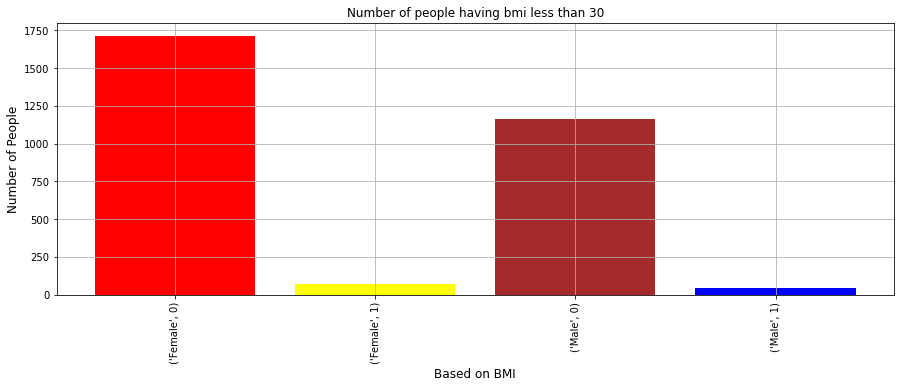

In [89]:
x = range(len(Q8))
plt.figure(figsize=(15,5))
plt.title("Number of people having bmi less than 30")
plt.bar(x, Q8.bmi, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q8.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on BMI", fontsize= 12)

In [90]:
#What is the status of stroke on people having bmi higher than 30?
bmi1 = df[df['bmi'] > 30]
bmi1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5091,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0
5096,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


In [91]:
Q9 = bmi1.groupby(['gender','stroke'])[['bmi']].count()
Q9

bmi
gender stroke      
Female 0       1049
       1         52
Male   0        748
       1         44

Text(0.5, 0, 'Based on BMI')

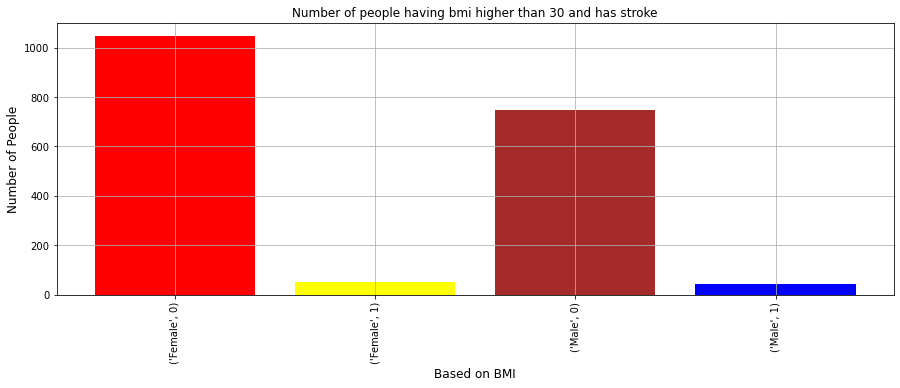

In [92]:
x = range(len(Q9))
plt.figure(figsize=(15,5))
plt.title("Number of people having bmi higher than 30 and has stroke")
plt.bar(x, Q9.bmi, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q9.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on BMI", fontsize= 12)


In [93]:
#how many male have hpertention, heart disease ans smokes and has stroke in different countryes
#df[(df['gender'] =='Female') |  (df['stroke'] == "0") | (df['hypertension'] == '0')]
#how many male and female are marred and has stroke
#df.groupby(['gender', 'ever_married', 'stroke'])[['stroke']].count()

In [94]:
#10:What is the number of people having heart disease?
Q10 = bmi.groupby('heart_disease')[['stroke']].count()
Q10

,stroke
heart_disease,
0,2865
1,123


Text(0.5, 0, 'Based on Heart_Disease')

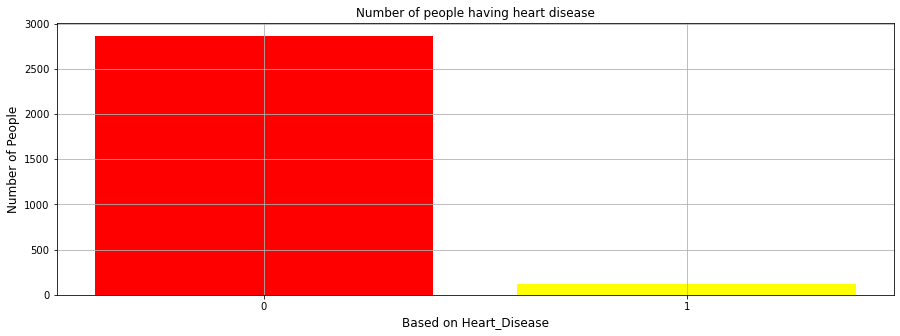

In [95]:
x = range(len(Q10))
plt.figure(figsize=(15,5))
plt.title("Number of people having heart disease")
plt.bar(x, Q10.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q10.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Heart_Disease", fontsize= 12)
#here the 0 means the nigative and 1 means possitive

In [96]:
#11:What is the number of people who are married and having heart disease and their bmi is higher than 30?
Q11 = bmi.groupby(['ever_married','heart_disease'])[['stroke']].count()
Q11.rename(columns = {'stroke': 'number of people'})

number of people
ever_married heart_disease                  
No           0                          1310
             1                            13
Yes          0                          1555
             1                           110

Text(0.5, 0, 'Based on Heart_Disease and bmi')

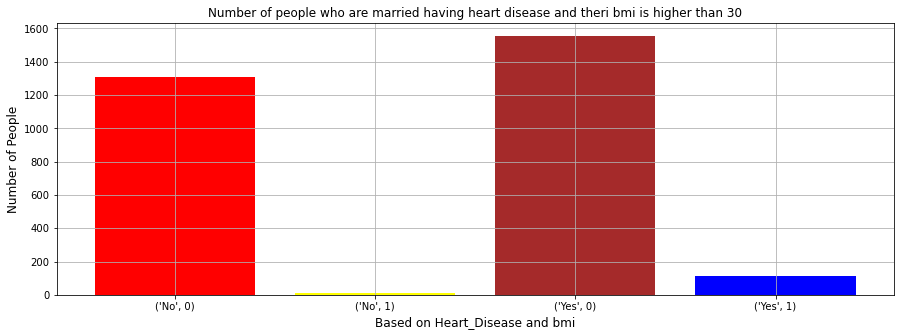

In [97]:
x = range(len(Q11))
plt.figure(figsize=(15,5))
plt.title("Number of people who are married having heart disease and theri bmi is higher than 30")
plt.bar(x, Q11.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q11.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Heart_Disease and bmi", fontsize= 12)
#here the 0 means the nigative and 1 means possitive


In [98]:
#11:What is the number of people who are married and having heart disease, stroke and their bmi is higher than 30?
Q12 = bmi.groupby(['ever_married','heart_disease', 'stroke'])[['stroke']].count()
Q12.rename(columns = {'stroke': 'number of people'})
# if we see the result it is very messy and not that much clear.
# to make it more understandable, we have to find the person who are married and has stroke. then we can find the nubmer people 
#who are married and have heart disease.


number of people
ever_married heart_disease stroke                  
No           0             0                   1299
                           1                     11
             1             0                     12
                           1                      1
Yes          0             0                   1473
                           1                     82
             1             0                     93
                           1                     17

Text(0.5, 0, 'Based on Heart_Disease, stroke, and bmi')

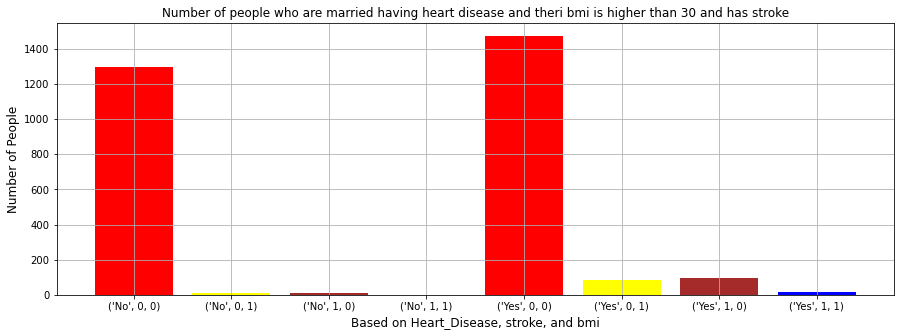

In [99]:
x = range(len(Q12))
plt.figure(figsize=(15,5))
plt.title("Number of people who are married having heart disease and theri bmi is higher than 30 and has stroke")
plt.bar(x, Q12.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q12.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Heart_Disease, stroke, and bmi", fontsize= 12)
#here the 0 means the nigative and 1 means possitive

In [100]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [101]:
#What is the status of stroke on people whose age is less than 30?
age = df[df['age'] < 30]
age

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
265,19584,Female,20.00,0,0,No,Private,Urban,84.62,19.7,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5093,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5094,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5097,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5102,22127,Female,18.00,0,0,No,Private,Urban,82.85,46.9,Unknown,0


In [102]:
Q13 = age.groupby('stroke')[['stroke']].count()
Q13.rename(columns = {'stroke': 'Number of People'})

,Number of People
stroke,
0,1481
1,1


Text(0.5, 0, 'Based on Age and Stroke')

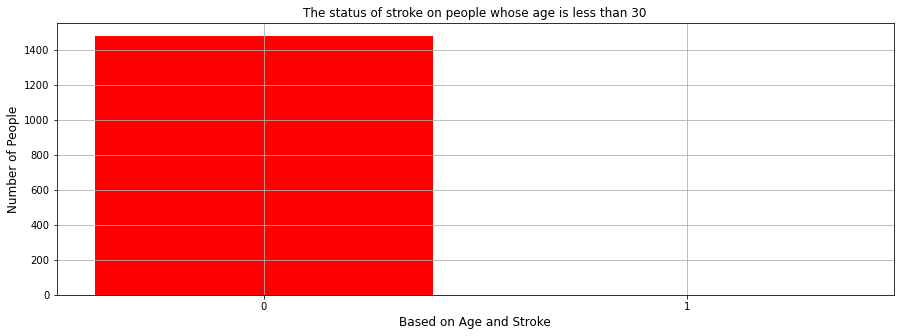

In [103]:
x = range(len(Q13))
plt.figure(figsize=(15,5))
plt.title("The status of stroke on people whose age is less than 30")
plt.bar(x, Q13.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q13.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Age and Stroke", fontsize= 12)
#here the 0 means the nigative and 1 means possitive.

In [104]:
#What is the status of stroke on people whose age is less than 30?
age = df[df['age'] > 30]
age

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [105]:
Q14 = age.groupby('stroke')[['stroke']].count()
Q14.rename(columns = {'stroke': 'Number of People'})

,Number of People
stroke,
0,3165
1,208


Text(0.5, 0, 'Based on Age and Stroke')

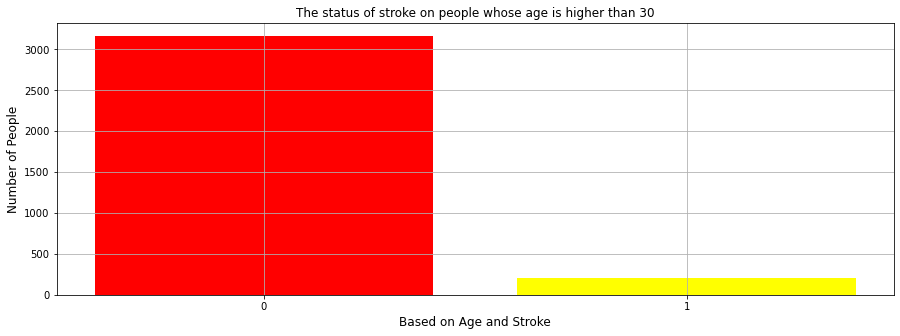

In [106]:
x = range(len(Q14))
plt.figure(figsize=(15,5))
plt.title("The status of stroke on people whose age is higher than 30")
plt.bar(x, Q14.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q14.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Age and Stroke", fontsize= 12)
#here the 0 means the nigative and 1 means possitive.

In [107]:
#what is the number of people whose work type is different.
Q15 = df.groupby(['work_type'])[['stroke']].count()
Q15.rename(columns = {'stroke':'number of people'})

,number of people
work_type,
Govt_job,630
Never_worked,22
Private,2810
Self-employed,775
children,671


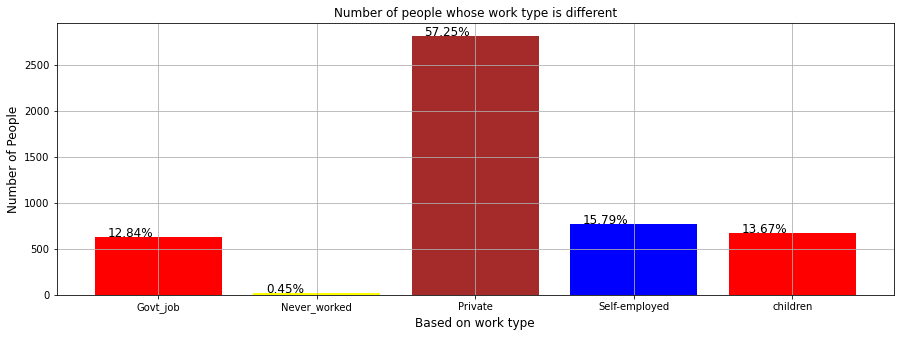

In [137]:
x = range(len(Q15))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number of people whose work type is different")
plt.bar(x, Q15.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q15.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on work type", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')
#here the 0 means the nigative and 1 means possitive.

In [110]:
#what is the number of people whose work type is different ans has storke.
Q16 = df.groupby(['work_type', 'stroke'])[['stroke']].count()
Q16.rename(columns = {'stroke':'number of people'})

number of people
work_type     stroke                  
Govt_job      0                    602
              1                     28
Never_worked  0                     22
Private       0                   2683
              1                    127
Self-employed 0                    722
              1                     53
children      0                    670
              1                      1

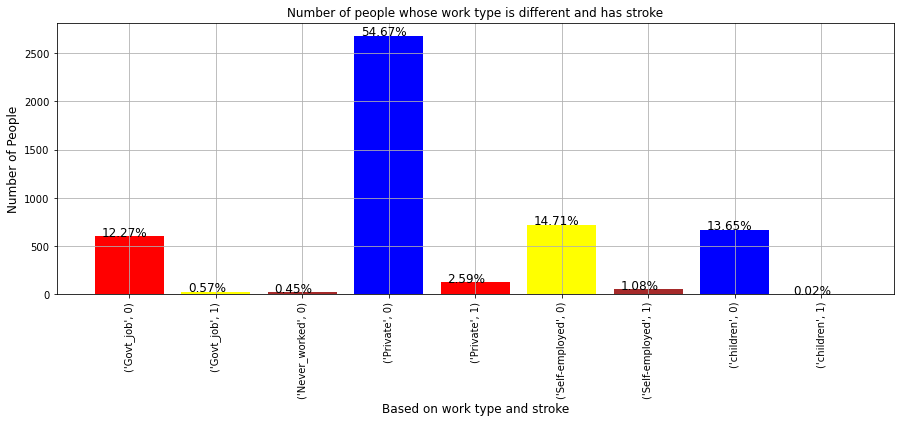

In [136]:
x = range(len(Q16))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number of people whose work type is different and has stroke")
plt.bar(x, Q16.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q16.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on work type and stroke", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')
#here the 0 means the nigative and 1 means possitive.

In [116]:
#what is the number of people whose work type is different and has hypertension?
Q17 = df.groupby(['work_type', 'hypertension'])[['hypertension']].count()
Q17.rename(columns = {'hypertension':'number of people'})

number of people
work_type     hypertension                  
Govt_job      0                          563
              1                           67
Never_worked  0                           22
Private       0                         2555
              1                          255
Self-employed 0                          646
              1                          129
children      0                          671

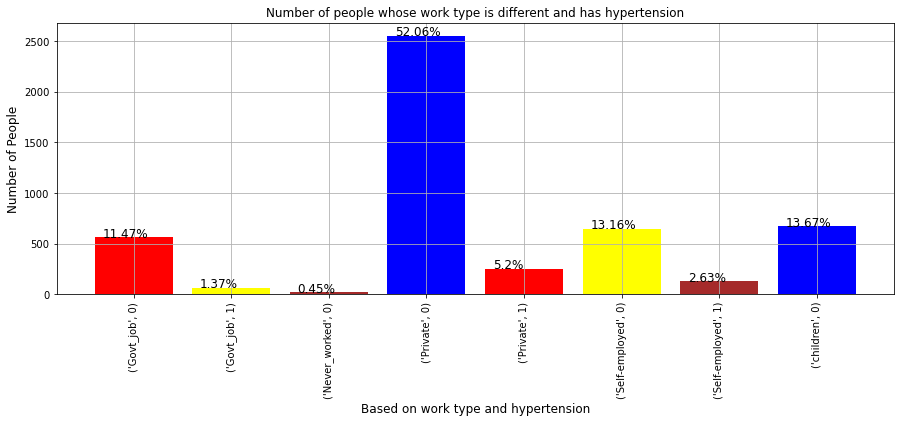

In [135]:
x = range(len(Q17))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number of people whose work type is different and has hypertension")
plt.bar(x, Q17.hypertension, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q17.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on work type and hypertension", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')
#here the 0 means the nigative and 1 means possitive.

In [119]:
#what is the number of Male and Female whose work type is different?
Q18 = df.groupby(['gender','work_type'])[['stroke']].count()
Q18.rename(columns = {'stroke':'number of people'})

number of people
gender work_type                      
Female Govt_job                    384
       Never_worked                 11
       Private                    1705
       Self-employed               477
       children                    320
Male   Govt_job                    246
       Never_worked                 11
       Private                    1105
       Self-employed               298
       children                    351

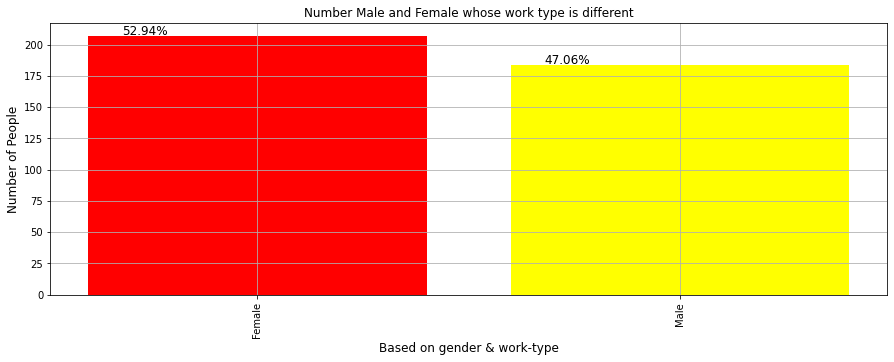

In [134]:
x = range(len(Q18))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number Male and Female whose work type is different")
plt.bar(x, Q18.stroke, color= ['red','yellow','brown', 'blue'])
plt.grid(True)
plt.xticks(x, Q18.index, fontsize=10, rotation = 90)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on gender & work-type", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')
#here the 0 means the nigative and 1 means possitive.


In [122]:
glocuse = df[df['avg_glucose_level'] >200]
glocuse

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
21,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
22,68794,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5028,66951,Female,72.0,0,0,Yes,Private,Urban,206.49,26.3,never smoked,0
5033,65405,Female,79.0,0,0,No,Private,Urban,253.86,28.8,formerly smoked,0
5034,49773,Female,78.0,0,0,Yes,Private,Urban,203.36,28.7,formerly smoked,0
5060,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0


In [123]:
#what is the number of Male and Female whose glocuse level is above 200 is different?
Q18 = glocuse.groupby(['gender'])[['stroke']].count()
Q18.rename(columns = {'stroke':'number of people'})

,number of people
gender,
Female,207
Male,184


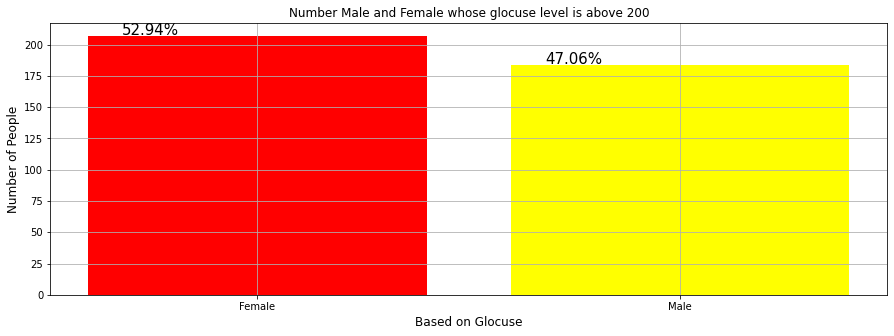

In [133]:
x = range(len(Q18))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number Male and Female whose glocuse level is above 200")
plt.bar(x, Q18.stroke, color= ['red','yellow'])
plt.grid(True)
plt.xticks(x, Q18.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Glocuse", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='black')


In [128]:
glocuse = df[df['avg_glucose_level'] < 200]
glocuse

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [129]:
#what is the number of Male and Female whose glocuse level is less than 200 is different?
Q20 = glocuse.groupby(['gender'])[['avg_glucose_level']].count()
Q20.rename(columns = {'stroke':'number of people'})

,avg_glucose_level
gender,
Female,2690
Male,1827


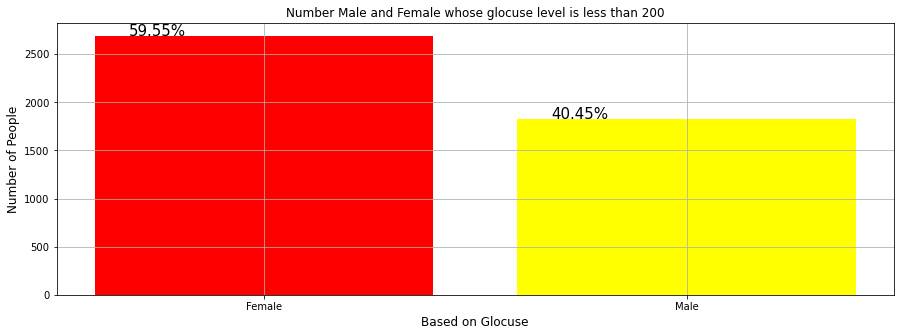

In [132]:
x = range(len(Q20))
plt.figure(figsize=(15,5))
ax=plt.axes()
plt.title("Number Male and Female whose glocuse level is less than 200")
plt.bar(x, Q20.avg_glucose_level, color= ['red','yellow'])
plt.grid(True)
plt.xticks(x, Q20.index, fontsize=10)
plt.ylabel("Number of People", fontsize = 12)
plt.xlabel("Based on Glocuse", fontsize= 12)

totals = []
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy() 
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.08, i.get_height()+.9,             str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,color='black')